## HomeWork 1
### Seyed Mohammad Sheikh Ahmadi Gandab
### s327914@studenti.polito.it


###  Ehsan Dashti
###  s316511@studenti.polito.it

## Excercise 1

### import dependencies

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### define the graph

In [81]:
G = nx.DiGraph()

edges = [
    ('o', 'a', 3,'e1'),  # e1
    ('a', 'd', 2,'e2'),  # e2
    ('o', 'b', 3,'e3'),  # e3
    ('b', 'd', 2,'e4'),  # e4
    ('b', 'c', 3,'e5'),  # e5
    ('c', 'd', 1,'e6'),  # e6
    ('a', 'b', 1,'e7')   # e7
]

# G.add_weighted_edges_from(edges, weight='capacity',lable'=lable')
for u, v, weight, label in edges:
    G.add_edge(u, v, weight=weight, label=label)

### draw the graph

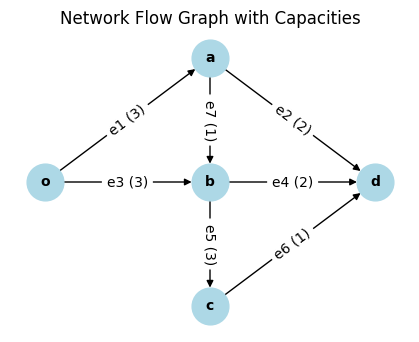

In [85]:
pos = {
    'o': (-1, 0),
    'a': (0, 1),
    'b': (0, 0),
    'c': (0, -1),
    'd': (1, 0)
}

# Draw the nodes and edges
plt.figure(figsize=(4, 3))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")

# Draw edge labels for capacities
edge_labels = {(u, v): f"{d['label']} ({d['weight']})" 
                for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Network Flow Graph with Capacities")
plt.savefig('ex1')
plt.show()

### part A

#### compute the minimum cut

In [86]:
cut_value, partition = nx.minimum_cut(G, 'o', 'd', capacity='weight')

print(f"The minimum cut capacity needed to disconnect 'o' from 'd' is: {cut_value}")
print(f"partitions: {partition}")


The minimum cut capacity needed to disconnect 'o' from 'd' is: 5
partitions: ({'c', 'o', 'b', 'a'}, {'d'})


### part B

#### a function to compute maxflow by increasing x

In [87]:

def max_flow_with_extra_capacity(G, x):
    G_temp = G.copy()
    for u, v in G.edges():
        G_temp[u][v]['weight'] += x
    flow_value,_ = nx.maximum_flow(G_temp, 'o', 'd',capacity='weight')
    print("max flow with x =  ",x," is ",flow_value)
    return flow_value

#### we should add extra capacity to the edges with min cut value, but here we can add all edges x unit and there wouldn't be any differences

max flow with x =   0  is  5
max flow with x =   1  is  8
max flow with x =   2  is  10
max flow with x =   3  is  12
max flow with x =   4  is  14
max flow with x =   5  is  16
max flow with x =   6  is  18
max flow with x =   7  is  20
max flow with x =   8  is  22
max flow with x =   9  is  24
max flow with x =   10  is  26


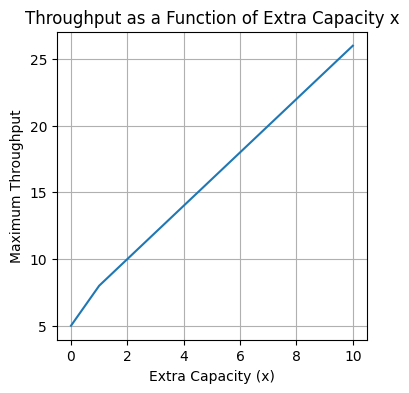

In [91]:

# Generate data for different values of x
x_values = list(range(0, 11))  # for x from 0 to 10
flow_values = [max_flow_with_extra_capacity(G, x) for x in x_values]

# Plotting
plt.figure(figsize=(4,4))
plt.plot(x_values, flow_values,)
plt.xlabel("Extra Capacity (x)")
plt.ylabel("Maximum Throughput")
plt.title("Throughput as a Function of Extra Capacity x")
plt.grid(True)
plt.savefig('ex1b')
plt.show()


### part C

#### new edges for considering as possible edge

In [92]:
new_edges = [('o', 'd'), ('o', 'c'), ('a', 'c')]

#### a function for calculate all the possible ways

In [93]:
def max_flow_with_new_edge(G, edge, x):
    G_temp = G.copy()
    G_temp.add_edge(*edge, weight=1 + x)
    flow_value, _ = nx.maximum_flow(G_temp, 'o', 'd',capacity="weight")
    return flow_value


#### trying x = 0 till x = 10 to plot the result

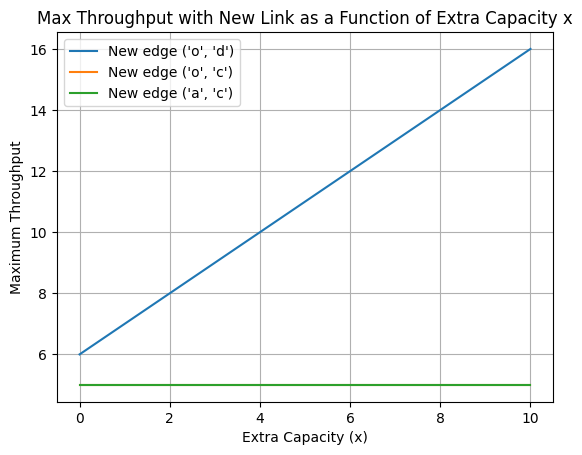

In [94]:
x_values = list(range(0, 11))
results = {edge: [max_flow_with_new_edge(G, edge, x) for x in x_values] for edge in new_edges}

# Plotting
for edge, flow_values in results.items():
    plt.plot(x_values, flow_values, label=f"New edge {edge}")

plt.xlabel("Extra Capacity (x)")
plt.ylabel("Maximum Throughput")
plt.title("Max Throughput with New Link as a Function of Extra Capacity x")
plt.legend()
plt.grid(True)
plt.savefig('ex1c')
plt.show()

## EX 2

### define the graph

In [2]:
G = nx.DiGraph()

# Add nodes for people and foods
people = ['a1', 'a2', 'a3', 'a4']
foods = ['b1', 'b2', 'b3', 'b4']
# Define person to food interests
interests = {
    'a1': ['b1', 'b2'],
    'a2': ['b2', 'b3'],
    'a3': ['b1', 'b4'],
    'a4': ['b1', 'b2', 'b4']
}

# Add edges from people to their interested foods with capacity 1
for person, food_list in interests.items():
    for food in food_list:
        G.add_edge(person, food, capacity=1)


### draw the graph

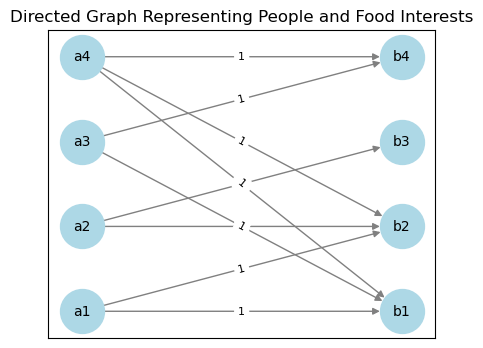

In [3]:
plt.figure(figsize=(5, 4))

# Position the nodes using a bipartite layout
pos = {}
pos.update((node, (0, i)) for i, node in enumerate(people))  # Left side for people
pos.update((node, (1, i)) for i, node in enumerate(foods))    # Right side for foods

nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, edge_color='gray')

# Draw edge labels showing the capacity
edge_labels = {(u, v): f"{d['capacity']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Directed Graph Representing People and Food Interests")
plt.savefig('ex2_0')
plt.show()

### preprocess : 
#### for using max flow we should add a source as S then connect it to all people with capacity 1, Also we need a sink as T to connect to all foods with capacity 1

In [4]:
source = 'S'
sink = 'T'


# Add edges from source to people with capacity 1
for person in people:
    G.add_edge(source, person, capacity=1)

# Add edges from foods to sink with capacity 1
for food in foods:
    G.add_edge(food, sink, capacity=1)


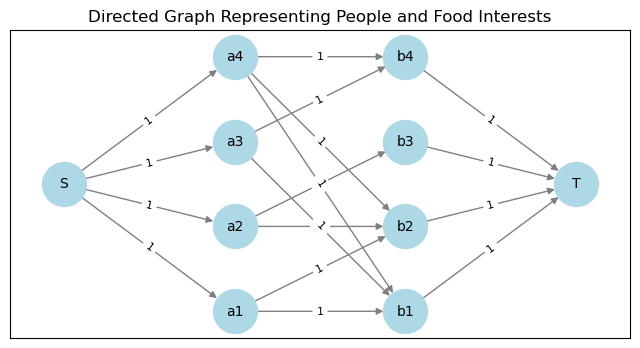

In [5]:
# Draw the graph
pos['S'] = (-1,1.5)
pos['T'] = (2, 1.5)
plt.figure(figsize=(8, 4))
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, edge_color='gray')

# Draw edge labels showing the capacity
edge_labels = {(u, v): f"{d['capacity']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Directed Graph Representing People and Food Interests")
plt.savefig('ex2_1')
plt.show()

### part A

In [6]:
# Find the maximum flow using the Edmonds-Karp algorithm
flow_value, flow_dict = nx.maximum_flow(G, source, sink)

print("Maximum Flow Value:", flow_value)
print("Flow Details:")
for key, value in flow_dict.items():
    if(key.startswith('a')):
        print(key, "->", value)


Maximum Flow Value: 4
Flow Details:
a1 -> {'b1': 0, 'b2': 1}
a2 -> {'b2': 0, 'b3': 1}
a3 -> {'b1': 1, 'b4': 0}
a4 -> {'b1': 0, 'b2': 0, 'b4': 1}


### part B
#### for these two forwarding parts we should change the capacity of edges.
#### - this part we update the food-sink edges based on number of existing portions. 
#### - Also the capacity of People-food should be 1 because people can't have more than 1 portion from each food.
#### - Also the capacity of source-people should be infinite because each person can take an arbitrary number of different foods. 

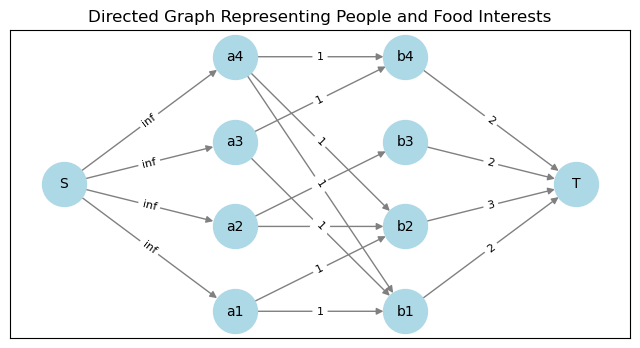

In [7]:
G['b1']['T']['capacity'] = 2
G['b2']['T']['capacity'] = 3
G['b3']['T']['capacity'] = 2
G['b4']['T']['capacity'] = 2
G['S']['a1']['capacity'] = float('inf')
G['S']['a2']['capacity'] = float('inf')
G['S']['a3']['capacity'] = float('inf')
G['S']['a4']['capacity'] = float('inf')


plt.figure(figsize=(8, 4))
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, edge_color='gray')

# Draw edge labels showing the capacity
edge_labels = {(u, v): f"{d['capacity']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Directed Graph Representing People and Food Interests")
plt.savefig('ex2b')
plt.show()

In [8]:
# Find the maximum flow using the Edmonds-Karp algorithm
flow_value, flow_dict = nx.maximum_flow(G, source, sink)

print("Maximum Flow Value:", flow_value)
print("Flow Details:")
for key, value in flow_dict.items():
    if(key.startswith('a')):
        print(key, "->", value)


Maximum Flow Value: 8
Flow Details:
a1 -> {'b1': 0, 'b2': 1}
a2 -> {'b2': 1, 'b3': 1}
a3 -> {'b1': 1, 'b4': 1}
a4 -> {'b1': 1, 'b2': 1, 'b4': 1}


### part C
#### - this part we update the capacity of People-food to infinite because people can have more than 1 portion from each food.
#### - Also the capacity of source-people should be based on demand number of each person.

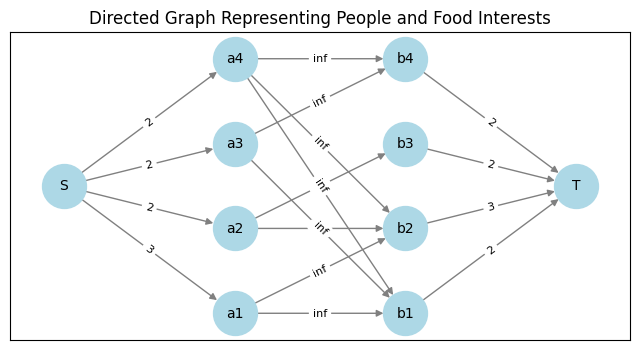

In [107]:
for person, food_list in interests.items():
    for food in food_list:
        G.add_edge(person, food, capacity=float('inf'))
G['S']['a1']['capacity'] = 3
G['S']['a2']['capacity'] = 2
G['S']['a3']['capacity'] = 2
G['S']['a4']['capacity'] = 2


plt.figure(figsize=(8, 4))
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, edge_color='gray')

# Draw edge labels showing the capacity
edge_labels = {(u, v): f"{d['capacity']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Directed Graph Representing People and Food Interests")
plt.savefig('ex2c')
plt.show()

In [108]:
# Find the maximum flow using the Edmonds-Karp algorithm
flow_value, flow_dict = nx.maximum_flow(G, source, sink)

print("Maximum Flow Value:", flow_value)
print("Flow Details:")
for key, value in flow_dict.items():
    if(key.startswith('a')):
        print(key, "->", value)


Maximum Flow Value: 9
Flow Details:
a1 -> {'b1': 0, 'b2': 3}
a2 -> {'b2': 0, 'b3': 2}
a3 -> {'b1': 2, 'b4': 0}
a4 -> {'b1': 0, 'b2': 0, 'b4': 2}


## EX 3

In [17]:
import scipy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')["traffic"]
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

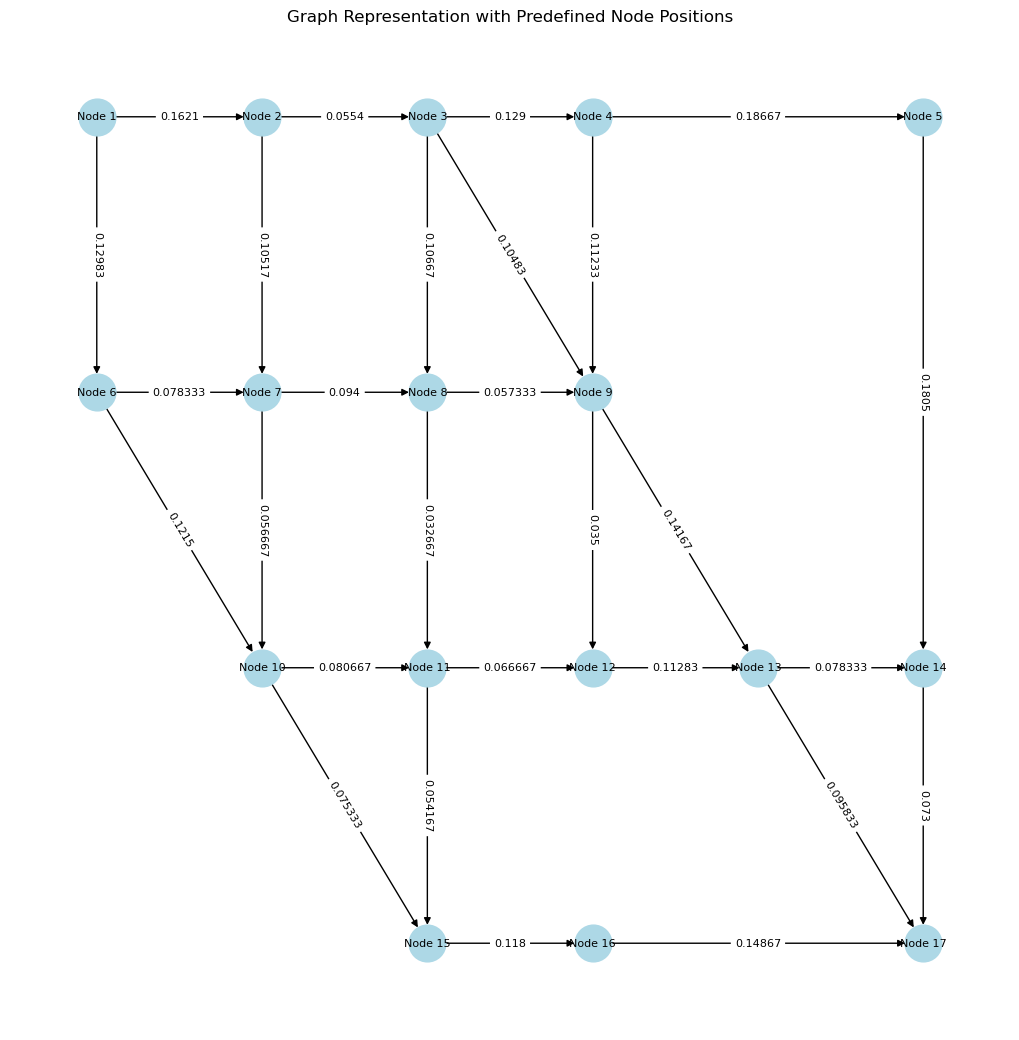

The shortest path from Node 1 to Node 17 is: ['Node 1', 'Node 2', 'Node 3', 'Node 9', 'Node 13', 'Node 17']
The total travel time for this path is: 0.559833


In [18]:


# Create the directed graph
G = nx.DiGraph()

# Add edges to the graph
num_links = B.shape[1]

for i in range(num_links):
    # Find the tail and head nodes
    tail_node = np.where(B[:, i] == 1)[0][0]  # Tail node (0-based indexing)
    head_node = np.where(B[:, i] == -1)[0][0]  # Head node (0-based indexing)
    travel_time = l[i]  # Get the travel time for the edge
    G.add_edge(f"Node {tail_node + 1}", f"Node {head_node + 1}", weight=travel_time)  # Use 1-based labels for nodes

# Predefined positions for nodes
plt.figure(figsize=(10, 10))
pos = {
    "Node 1": (0, 4),
    "Node 6": (0, 3),
    "Node 2": (1, 4),
    "Node 7": (1, 3),
    "Node 10": (1, 2),
    "Node 3": (2, 4),
    "Node 8": (2, 3),
    "Node 11": (2, 2),
    "Node 15": (2, 1),
    "Node 4": (3, 4),
    "Node 9": (3, 3),
    "Node 12": (3, 2),
    "Node 16": (3, 1),
    "Node 13": (4, 2),
    "Node 5": (5, 4),
    "Node 14": (5, 2),
    "Node 17": (5, 1),
}

# Draw the graph using the predefined positions
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=8)

# Add edge weights as labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot

plt.title("Graph Representation with Predefined Node Positions")
plt.show()

# Find the shortest path from Node 1 to Node 17
start_node = "Node 1"
end_node = "Node 17"

try:
    shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight="weight")
    shortest_path_length = nx.shortest_path_length(G, source=start_node, target=end_node, weight="weight")

    print(f"The shortest path from {start_node} to {end_node} is: {shortest_path}")
    print(f"The total travel time for this path is: {shortest_path_length}")
except nx.NetworkXNoPath:
    print(f"No path exists between {start_node} and {end_node}.")


### A

In [19]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the traffic matrix and travel times
num_nodes = B.shape[0]  # Number of nodes in the network
num_links = B.shape[1]  # Number of links in the network

# Iterate over each link in the traffic matrix to add edges
for i in range(num_links):
    # Find the tail node (with a +1 in the traffic matrix)
    tail_node = np.where(B[:, i] == 1)[0][0] + 1
    # Find the head node (with a -1 in the traffic matrix)
    head_node = np.where(B[:, i] == -1)[0][0] + 1
    # Get the travel time for this link
    travel_time = l[i]
    # Add an edge to the graph with the travel time as the weight
    G.add_edge(tail_node, head_node, weight=travel_time)
    




In [20]:
# Find the shortest path from node 1 to node 17
shortest_path = nx.dijkstra_path(G, source=1, target=17, weight='weight')

# Calculate the total travel time for this path
shortest_path_time = nx.dijkstra_path_length(G, source=1, target=17, weight='weight')

# Print the results
print("Shortest Path:", shortest_path)
print("Total Travel Time:", shortest_path_time)


Shortest Path: [1, 2, 3, 9, 13, 17]
Total Travel Time: 0.559833


### B

In [21]:
# Create a directed graph for the maximum flow calculation
G_flow = nx.DiGraph()

# Add edges with capacities based on the traffic matrix and capacities data
for link_index in range(num_links):
    # Find the tail and head nodes for each link (as we did previously)
    tail_node = np.where(B[:, link_index] == 1)[0][0] + 1
    head_node = np.where(B[:, link_index] == -1)[0][0] + 1
    # Get the capacity for this link
    capacity = C[link_index]
    # Add the edge with capacity as the weight for the flow calculation
    G_flow.add_edge(tail_node, head_node, capacity=capacity)


In [22]:
# Calculate the maximum flow from node 1 to node 17
max_flow_value, max_flow_dict = nx.maximum_flow(G_flow, 1, 17)

# Print the results
print("Maximum Flow Value:", max_flow_value)
print("Flow Distribution:", max_flow_dict)


Maximum Flow Value: 22448
Flow Distribution: {1: {2: 8741, 6: 13707}, 2: {3: 8741, 7: 0}, 3: {4: 0, 8: 0, 9: 8741}, 4: {5: 0, 9: 0}, 5: {14: 0}, 6: {7: 4624, 10: 9083}, 7: {8: 4624, 10: 0}, 8: {9: 4624, 11: 0}, 9: {13: 6297, 12: 7068}, 13: {14: 3835, 17: 10355}, 14: {17: 3835}, 10: {11: 825, 15: 8258}, 11: {12: 825, 15: 0}, 15: {16: 8258}, 12: {13: 7893}, 17: {}, 16: {17: 8258}}


### C 

In [23]:
nu = np.dot(B, f)

print("Resulting vector v:", nu)

Resulting vector v: [ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


### Part D

In [26]:
import cvxpy as cp
import numpy as np
import scipy.io

# Updated v vector based on given conditions
nu_modified = np.zeros_like(nu)
nu_modified[0] = nu[0]  # Node 1 retains its original value
nu_modified[-1] = -nu[0]  # Node 17 set to -nu_vector[0]

nu = nu_modified     # Updated v with the given constraints

# Define the number of links
num_links = len(f)

# Define the flow variable
f__Variable = cp.Variable(28)


# Define the cost function
fl = cp.multiply(f__Variable,l)
lc = cp.multiply(l, C)
f_c= f__Variable/C
cost_function = cp.sum(cp.multiply(lc, cp.inv_pos(1 - f_c)) - lc)

# Define the constraints
constraints = [
    B @ f__Variable == nu,
    f__Variable >= 0,
    f__Variable <= C
]

# Set up the optimization problem
problem = cp.Problem(cp.Minimize(cost_function), constraints)

# Solve the problem
result = problem.solve()

# Display the optimal flow values
f_optimal = f__Variable.value
print("Optimal Flow Values:")
print(f_optimal)

delay = np.sum(l * C / (1 - f_optimal / C) - l * C)
print('total delay: ',delay)

Optimal Flow Values:
[6.37458648e+03 5.66544280e+03 2.90469700e+03 2.90469515e+03
 9.90741352e+03 4.52798777e+03 2.95050425e+03 2.48738468e+03
 3.01825442e+03 7.09143680e+02 8.94419224e-03 2.76073686e+03
 1.84265590e-03 2.90469515e+03 5.37942575e+03 2.76619021e+03
 4.89986274e+03 2.28662720e+03 4.63128517e+02 2.22986896e+03
 3.22931627e+03 5.45918523e+03 2.30731755e+03 2.45326148e-03
 6.17012210e+03 5.21201270e+03 4.89986520e+03 4.89986520e+03]
total delay:  23997.160893545046


### Part E

In [ ]:
# Define the optimization variable for flow
f__Variable = cp.Variable(f.shape)


cost_function = cp.sum(cp.multiply(-l * C, cp.log(1 - cp.multiply(f__Variable, cp.inv_pos(C)))))

# Define the constraints
constraints = [
    B @ f__Variable == nu,  # Flow conservation
    f__Variable >= 0,       # Non-negativity
    f__Variable <= C        # Capacity limits
]

# Solve the optimization problem
problem_cp_we = cp.Problem(cp.Minimize(cost_function), constraints)
result = problem_cp_we.solve()

# Extract the Wardrop equilibrium flow
f_optimal = f__Variable.value

delay = np.sum(l * C / (1 - f_optimal / C) - l * C)

# Print results
print('Optimal f (Wardrop Equilibrium): \n', f_optimal)
print('Total delay (Wardrop Equilibrium): ', delay)

Optimal f (Wardrop Equilibrium): 
 [6.34959545e+03 6.17822408e+03 2.03775222e+03 2.03775221e+03
 9.93240455e+03 4.56732063e+03 2.73811937e+03 2.14413313e+03
 3.27077894e+03 1.71371371e+02 6.92104093e+01 4.07126145e+03
 6.80451564e-06 2.03775221e+03 5.36508392e+03 2.20295556e+03
 5.16270099e+03 2.00057263e+03 6.63196643e+02 2.94461565e+03
 2.86615219e+03 5.81076784e+03 2.43669203e+03 1.07681020e-05
 6.64485475e+03 4.47444424e+03 5.16270100e+03 5.16270100e+03]
Total delay (Wardrop Equilibrium):  24341.24307789489
